In [1]:
import numpy as np               # For number manipulation
import pandas as pd              # For importing data to a DataFrame
import matplotlib.pyplot as plt  # For plotting graphs
plt.rcParams["figure.figsize"] = (10,10)
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing                     # To convert string columns to numeric for numeric analysis
from sklearn.neighbors import KNeighborsClassifier    # A ML Model/Algorithm  

from sklearn.model_selection import train_test_split  # For the Hold-out method
from sklearn.tree import DecisionTreeClassifier       # A ML Model/Algorithm  
from sklearn.naive_bayes import GaussianNB            # A ML Model/Algorithm 
from sklearn.cluster import KMeans                    # A ML Model/Algorithm 
from sklearn.linear_model import LinearRegression     # A ML Model/Algorithm  
from sklearn.linear_model import LogisticRegression   # A ML Model/Algorithm  



Raw Data

                     Model  Year  Kilometers Fuel_Type  Price
0     Honda Accord 2.4 AT  2009      101867   Petrol    2900
1     Honda Accord 2.4 AT  2009       97241   Petrol    3000
2     Honda Accord 2.4 AT  2009       64533   Petrol    3200
3     Honda Accord 2.4 AT  2009       63000   Petrol    3300
4     Honda Accord 2.4 AT  2010      100000   Petrol    3100
..                    ...   ...         ...       ...    ...
977  Honda WR-V i-VTEC VX  2019       28000   Petrol    8650
978  Honda WR-V i-VTEC VX  2020       15000   Petrol    9250
979  Honda WR-V i-VTEC VX  2021       30000   Petrol    9500
980  Honda WR-V i-VTEC VX  2021       16748   Petrol    8140
981  Honda WR-V i-VTEC VX  2022       10000   Petrol   10440

[982 rows x 5 columns]
              Year     Kilometers         Price
count   982.000000     982.000000    982.000000
mean   2014.769857   64732.007128   5522.912424
std       3.624583   39699.522031   2924.092734
min    2004.000000    1425.000000   100

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Kilometers'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

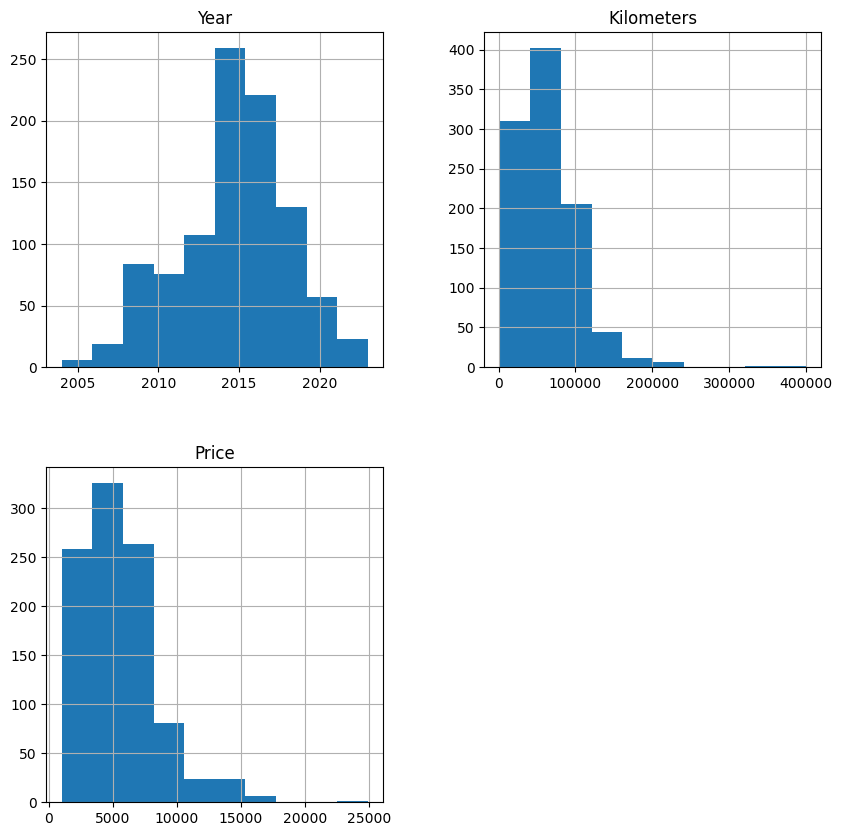

In [2]:
data = pd.read_csv("honda.csv")  # Read the Honda file into a DataFrame
print("\n\nRaw Data\n\n",data)   # Print the honda dataframe
print(data.describe())           # Describe the dataframe numereic columns
data.hist()                      # Generate histograms from the numeric columns  

In [3]:
# As we have text columns in the data and the algorithms perform best with numeric data, we do a transformation
# of the text columns into numeric values.  
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# apply to a single column
data['Model'] = labelencoder.fit_transform(data['Model'])
data['Fuel_Type'] = labelencoder.fit_transform(data['Fuel_Type'])

data.head()

,Model,Year,Kilometers,Fuel_Type,Price
0,0,2009,101867,1,2900
1,0,2009,97241,1,3000
2,0,2009,64533,1,3200
3,0,2009,63000,1,3300
4,0,2010,100000,1,3100


In [4]:
data.tail(2)

,Model,Year,Kilometers,Fuel_Type,Price
980,24,2021,16748,1,8140
981,24,2022,10000,1,10440


In [5]:
array = data.values
predictors = array[:,0:4] # Use all the rows, but only the 1st 4 columns, for to base your predictions
# Model, Year, Kilometers and Fuel_Tuype

targets = array[:,4]  # This is the column you are trying to predict, all the rows, the 5th column, Price, (index 4)

In [6]:
seed = 1 # To get repeatable results
test_size = 0.33 # The proportion of the data to use for testing, the rest is used for training.
predictors_train, predictors_test, targets_train, targets_test = train_test_split(predictors, targets, test_size = test_size, random_state = seed)

In [7]:
print("Selecting SEEN rows.")
row3   = [0,  2009, 64533, 1]  # See the 3rd line of preprocessed data above.  
row_last = [24, 2022, 10000, 1]  # See the last line of preprocessed data above. 
seens = [row3, row_last] 
print(row3)
print(row_last)

print("\nSelecting UNSEEN rows.")
# A car, similar to the line 3, but 2 years younger and one third the mileage
row_unseen1 =[0, 2011, 21511, 1]
# A car, similar to the last line, but 2 years older and triple the mileage
row_unseen2 =[24, 2020, 30000, 1]
unseens = [row_unseen1, row_unseen2]
print(row_unseen1)
print(row_unseen2)

Selecting SEEN rows.
[0, 2009, 64533, 1]
[24, 2022, 10000, 1]

Selecting UNSEEN rows.
[0, 2011, 21511, 1]
[24, 2020, 30000, 1]


In [8]:
neighbours = 9 # How many neighbors to check
DISTANCE_CALCULATION_EUCLIDEAN_METHOD = 2

model = KNeighborsClassifier(n_neighbors = neighbours, p=DISTANCE_CALCULATION_EUCLIDEAN_METHOD) 
# p tells us how to calculate the distance, euclidean in this case (2)

# Fit the model, these rows become the neighbors
model.fit(predictors_train, targets_train)

# Tests the accuracy of the model with known results
accuracy = model.score(predictors_test, targets_test)
accuracy = round(accuracy * 100, 2)
print("Accuracy = ", accuracy, "%")

Accuracy =  2.15 %


In [9]:
results = model.predict(seens) # The results are the last column, Price

print("Seen1   :", seens[0])
print("Result1 :", results[0])
print()

print("Seen2   :", seens[1])
print("Result2 :", results[1])

Seen1   : [0, 2009, 64533, 1]
Result1 : 2450

Seen2   : [24, 2022, 10000, 1]
Result2 : 6500


In [10]:
results = model.predict(unseens)

print("Unseen1 :", unseens[0])
print("Result1 :", results[0])
print()

print("Unseen2 :", unseens[1])
print("Result2 :", results[1])

Unseen1 : [0, 2011, 21511, 1]
Result1 : 4250

Unseen2 : [24, 2020, 30000, 1]
Result2 : 11500


In [11]:
model = DecisionTreeClassifier()

# Fit the model
model.fit(predictors_train, targets_train)

# Tests rthe accuracy of the model with known results
accuracy = model.score(predictors_test, targets_test)
accuracy = round(accuracy * 100, 2)

print("Accuracy =", accuracy, "%")

Accuracy = 6.77 %


In [12]:
results = model.predict(seens) 

print("Seen1 :", seens[0])
print("Result1 :", results[0])
print()

print("Seen2 :", seens[1])
print("Result2 :", results[1])

Seen1 : [0, 2009, 64533, 1]
Result1 : 4000

Seen2 : [24, 2022, 10000, 1]
Result2 : 10440


In [13]:
results = model.predict(unseens)

print("Unseen1 :", unseens[0])
print("Result1 :", results[0])
print()

print("Unseen2 :", unseens[1])
print("Result2 :", results[1])

Unseen1 : [0, 2011, 21511, 1]
Result1 : 4500

Unseen2 : [24, 2020, 30000, 1]
Result2 : 7500


In [14]:
model = GaussianNB()

# Fit the model, these rows become the neighbors
model.fit(predictors_train, targets_train)

# Tests rthe accuracy of the model with known results
accuracy = model.score(predictors_test, targets_test)
accuracy = round(accuracy * 100, 2)

print("Accuracy =", accuracy, "%")

Accuracy = 3.08 %


In [15]:
results = model.predict(seens)

print("Seen1   :", seens[0])
print("Result1 :", results[0])
print()

print("Seen2   :", seens[1])
print("Result2 :", results[1])

Seen1   : [0, 2009, 64533, 1]
Result1 : 3600

Seen2   : [24, 2022, 10000, 1]
Result2 : 10440


In [16]:
results = model.predict(unseens)

print("Unseen1 :", unseens[0])
print("Result1 :", results[0])
print()

print("Unseen2 :", unseens[1])
print("Result2 :", results[1])

Unseen1 : [0, 2011, 21511, 1]
Result1 : 3500

Unseen2 : [24, 2020, 30000, 1]
Result2 : 8650


In [17]:
# Create a KMeans object with 4 clusters, change this to see the effect, i.e. run with 4, then change to 6 or 8 and rerun.
kmeans = KMeans(n_clusters=8)

# Fit the KMeans model to the complete set of data as a single argument
kmeans.fit(array)

# Get the cluster labels for each data point, here the model assigns each element (row) to a cluster as best it can.
# The labels start at zero and work up..
labels = kmeans.labels_

# Get the unique values and their counts in the array
unique_values, counts = np.unique(labels, return_counts=True)
print("The Unique cluster labels are: ", unique_values)
print("The occurrances of each label are: ", counts, "\n")
   
for index, count in enumerate(counts):
    print(f"There are {count:3} occurrances of {unique_values[index]}.")
print("Total occurrances is:", sum(counts))

The Unique cluster labels are:  [0 1 2 3 4 5 6 7]
The occurrances of each label are:  [114 139 204  18   2  73 221 211] 

There are 114 occurrances of 0.
There are 139 occurrances of 1.
There are 204 occurrances of 2.
There are  18 occurrances of 3.
There are   2 occurrances of 4.
There are  73 occurrances of 5.
There are 221 occurrances of 6.
There are 211 occurrances of 7.
Total occurrances is: 982


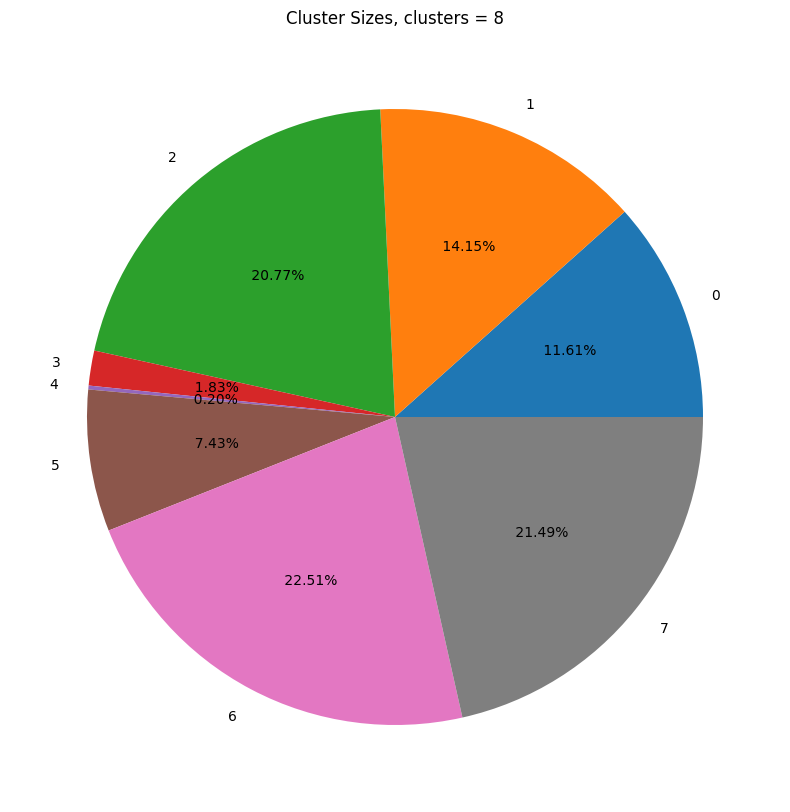

In [18]:
# In our example we have just the one axis, but more complex plots could have a number of axes inside the figure area.
figure, axes = plt.subplots() 

# You may wish to adjust some of these paramers
axes.pie(counts,       # The wedge slices 
         labels=unique_values,     
         autopct='%6.2f%%') # Floating point, precision and scale percentage, printed inside the sloce

# This code you copy and paste
plt.title(f'Cluster Sizes, clusters = {len(counts)}')
plt.show()

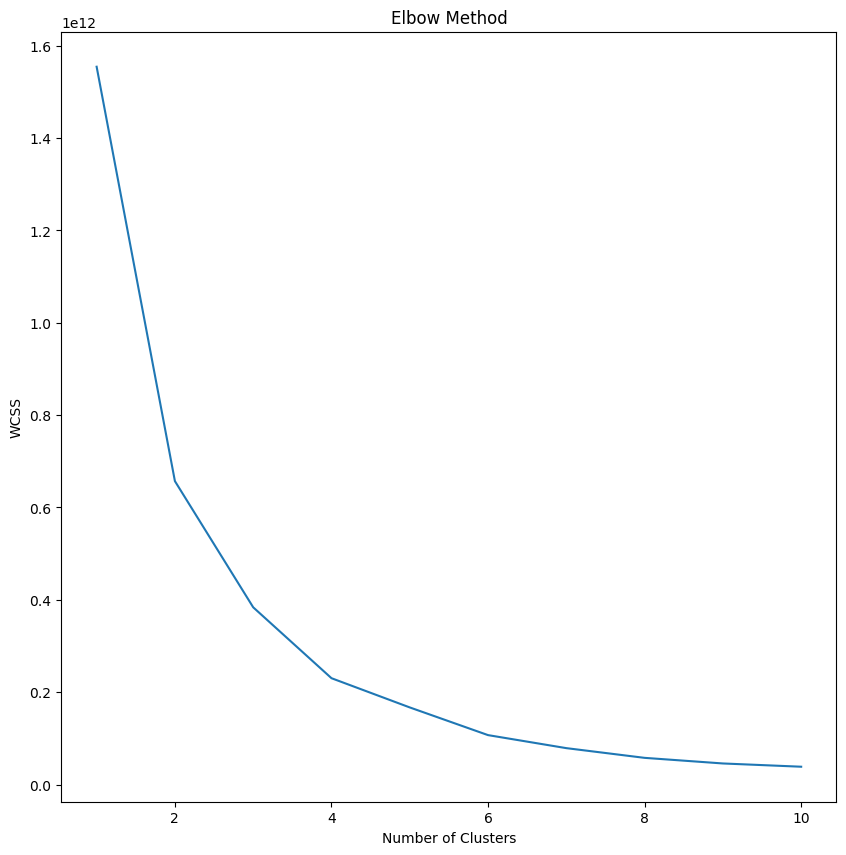

In [19]:
# Calculate the within-cluster sum of squares for each number of clusters
wcss = []
for index in range(1, 11):
    kmeans = KMeans(n_clusters=index, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(array)
    wcss.append(kmeans.inertia_)

# Plot the WCSS vs. number of clusters and look for the elbow point
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
model = LinearRegression()

# Fit the model, these rows become the neighbors
model.fit(predictors_train, targets_train)

# Tests rthe accuracy of the model with known results
accuracy = model.score(predictors_test, targets_test)
accuracy = round(accuracy * 100, 2)

print("Accuracy =", accuracy, "%")

Accuracy = 66.56 %


In [21]:
results = model.predict(seens) 

print("Seen1 :", seens[0])
print("Result1 :", int(results[0]))
print()

print("Seen2 :", seens[1])
print("Result2 :", int(results[1]))

Seen1 : [0, 2009, 64533, 1]
Result1 : 1272

Seen2 : [24, 2022, 10000, 1]
Result2 : 11108


In [22]:
results = model.predict(unseens)

print("Unseen1 :", unseens[0])
print("Result1 :", int(results[0]))
print()

print("Unseen2 :", unseens[1])
print("Result2 :", int(results[1]))

Unseen1 : [0, 2011, 21511, 1]
Result1 : 2551

Unseen2 : [24, 2020, 30000, 1]
Result2 : 9849


In [23]:
model = LogisticRegression()

# Fit the model, these rows become the neighbors
model.fit(predictors_train, targets_train)

# Tests rthe accuracy of the model with known results
accuracy = model.score(predictors_test, targets_test)
accuracy = round(accuracy * 100, 2)

print("Accuracy =", accuracy, "%")

Accuracy = 4.0 %


In [24]:
results = model.predict(seens) 

print("Seen1 :", seens[0])
print("Result1 :", int(results[0]))
print()

print("Seen2 :", seens[1])
print("Result2 :", int(results[1]))

Seen1 : [0, 2009, 64533, 1]
Result1 : 4000

Seen2 : [24, 2022, 10000, 1]
Result2 : 6500


In [25]:
results = model.predict(unseens)

print("Unseen1 :", unseens[0])
print("Result1 :", int(results[0]))
print()

print("Unseen2 :", unseens[1])
print("Result2 :", int(results[1]))

Unseen1 : [0, 2011, 21511, 1]
Result1 : 6500

Unseen2 : [24, 2020, 30000, 1]
Result2 : 6500
